# Tareas

<div class="alert alert-warning">
Fecha límite de entrega: 29 de Septiembre, 2021 23:59
</div>

In [2]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed, widgets,IntSlider,interact_manual,FloatSlider


Populating the interactive namespace from numpy and matplotlib


In [3]:

class RegresionLineal:
    def __init__(self, alpha=0.003, max_iters=10000, tols=0.00001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        self.i=0
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while i < self.max_iters:     
            # Actualizamos beta
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            if abs(J - prep_J) <= self.tols:
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), i ))
                self.breaking_iteration = i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            self.i += 1
    
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m

In [4]:
def plotModelo(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

## Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$
Para el caso de $\beta_0, \beta_1$ en $J(\beta_0,\beta_1)$.

In [5]:
from sympy import *
from sympy import Sum,init_printing,Indexed

Lo que debemos de hacer es definir la formula Costo y despues derivarla con respecto a B0 y B1


$$\textbf{J}(\beta_0, \beta_1) = \frac{1}{2n}\sum_{(x^{(i)}, y^{(i)}) \in X \times Y} (y^{(i)} - \hat{y}^{(i)}(x^{(i)}))^2 = \frac{1}{2n}\sum_{(x^{(i)}, y^{(i)}) \in X \times Y} (y^{(i)} - \beta_0 - \beta_1 x^{(i)})^2$$

In [6]:
x=Symbol('x')
y=Symbol('y')
b0=Symbol('beta0')
b1=Symbol('beta1')
n=Symbol('n')
i=Symbol('i')

In [7]:
costo= 1/(2*n)*Sum((Indexed(y,i)-b0-b1*Indexed(x,i))**2,(i,1,n))
costo

Sum((-beta0 - beta1*x[i] + y[i])**2, (i, 1, n))/(2*n)

In [9]:
deribeta0=diff(costo,b0)
simplify(deribeta0)

Sum(beta0 + beta1*x[i] - y[i], (i, 1, n))/n

Sum(2*beta0 + 2*beta1*x[i] - 2*y[i], (i, 1, n))/(2*n)

In [9]:
deribeta1=diff(costo,b1)
simplify(deribeta1)

Sum((beta0 + beta1*x[i] - y[i])*x[i], (i, 1, n))/n

## Problema 2

Usando el ejemplo de la clase ( i.e. Los archivos `edad.dat` y `altura.dat` contienen las mediciones de las estaturas (en metros) de varios niños entre las edad de 2 y 8 años. Cada _tupla_ de altura y edad, constituyen un ejemplo de entrenamiento $(x^{(i)}, y^{(i)})$ de nuestros datos. Hay $m = 50$ datos para entrenar que usaremos para realizar un modelo de regresión lineal. ) :

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 

**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.

**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

In [10]:
edad=np.loadtxt("edad.dat")
altura=np.loadtxt("altura.dat")

In [11]:
def J(beta0,beta1,X=edad,Y=altura):
    n=len(Y)
    costox=0
    for i in range(n):
        costox += 1/(2*n)*(Y[i]-beta0-beta1*X[i])**2
    return costox
    
    

In [12]:
beta0=np.arange(-2,2,0.1)
beta1=np.arange(-2,2,0.1)
B0,B1=np.meshgrid(beta0,beta1)
C=J(B0,B1)

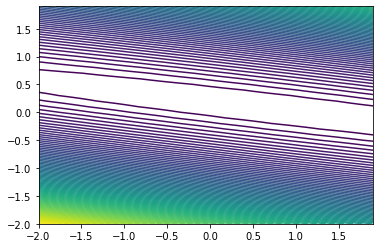

In [13]:

plt.contour(B0,B1,C,100)

plt.show()


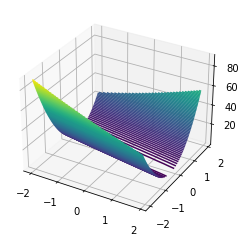

In [14]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.contour3D(B0,B1,C,100)

plt.show()

**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.


In [15]:
rb=RegresionLineal()
rb.gradientDescent(edad,altura)

La función convergió con beta: [0.20538735 0.16299624] en la iteración 0


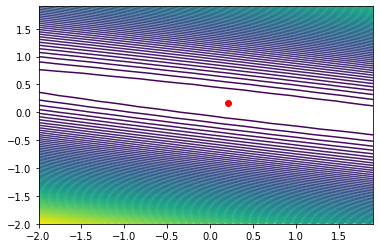

In [16]:
plt.contour(B0,B1,C,100)
plt.plot(rb.beta[0],rb.beta[1],"ro")
plt.show()

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.


In [17]:
def iterando(i):
    plt.contour(B0,B1,C,100)
    plt.plot(rb.beta[0],rb.beta[1],'go')
    plt.plot(rb.historia['beta'][i][0],rb.historia['beta'][i][1],'ro')
    plt.show()
    

In [18]:
interact(iterando,i=IntSlider(min=0,max=867,step=1,value=0))

interactive(children=(IntSlider(value=0, description='i', max=867), Output()), _dom_classes=('widget-interact'…

<function __main__.iterando(i)>

**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

In [19]:
def funcion(alpha=0.03):
    rb=RegresionLineal(alpha)
    rb.gradientDescent(edad,altura)
    return rb.beta,rb.i

In [24]:
interact_manual(funcion,alpha=FloatSlider(value=0.001,
        min=0.0001,
        max=0.1,
        step=0.00001));


interactive(children=(FloatSlider(value=0.001, description='alpha', max=0.1, min=0.0001, step=1e-05), Button(d…

## Problema 3

**(a)**  Usando los datos de `chirps.txt`

In [11]:
%cat chirps.txt

#Chirps/Second 	Temperature (º F)
20.0 	88.6
16.0 	71.6
19.8 	93.3
18.4 	84.3
17.1 	80.6
15.5 	75.2
14.7 	69.7
15.7 	71.6
15.4 	69.4
16.3 	83.3
15.0 	79.6
17.2 	82.6
16.0 	80.6
17.0 	83.5
14.4 	76.3


In [12]:
chirps=np.loadtxt("chirps.txt")
x=chirps.T[0]
y=chirps.T[1]


Text(0, 0.5, 'Temperature')

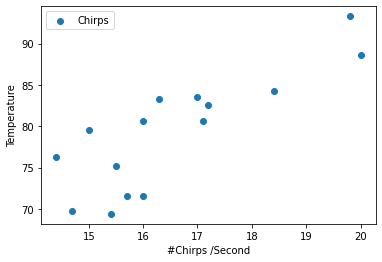

In [13]:
plt.scatter(x,y,label='Chirps')
plt.legend(loc="best")
plt.xlabel("#Chirps /Second")
plt.ylabel("Temperature")

In [14]:
r = RegresionLineal(alpha=0.003, max_iters=10000000, tols=0.0000001)
r.gradientDescent(x, y)

La función convergió con beta: [22.26350136  3.44531603] en la iteración 123659


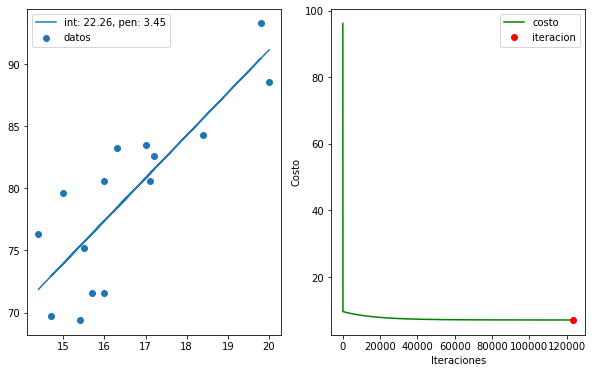

In [15]:
plotModelo(x,y,r,123658)


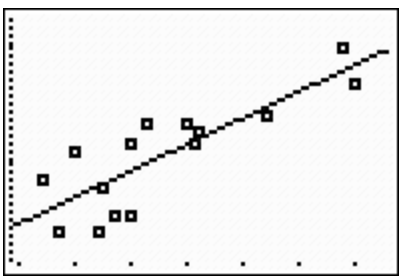

In [16]:
from IPython.display import Image
chirps = Image(filename = 'Chirps.png')
chirps

Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?

<div class="alert alert-success">
Al utilizar las formulas en las clases sobre "regresion lineal" es  que se pudo hacer la regresion

## Explique como llegó a los valores de  𝛼
Al usar una alpha tan chica es que el modelo no se quiebra, se discutio en clase en usar esa
## ¿Coinciden con los mostrados en la página web?
Comparando ambos graficas podemos ver que coinciden 
</div>


**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


## Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?

In [17]:
x1=np.array([10.0,8.0,13.0,9.0,11.0,14.0,6.0,4.0,12.0,7.0,5.0])
y1=np.array([8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.68])
x2=np.array([10.0,8.0,13.0,9.0,11.0,14.0,6.0,4.0,12.0,7.0,5.0])
y2=np.array([9.14,8.14,8.74,8.77,9.26,8.10,6.13,3.10,9.13,7.26,4.74])
x3=np.array([10.0,8.0,13.0,9.0,11.0,14.0,6.0,4.0,12.0,7.0,5.0])
y3=np.array([7.46,6.77,12.74,7.11,7.81,8.84,6.08,5.39,8.15,6.42,5.73])
x4=np.array([8.0,8.0,8.0,8.0,8.0,8.0,8.0,19.0,8.0,8.0,8.0])
y4=np.array([6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.5,5.56,7.91,6.89])


In [18]:
uno=RegresionLineal(alpha=0.003, max_iters=10000000, tols=0.0000001)
uno.gradientDescent(x1,y1)

La función convergió con beta: [2.94731748 0.50531651] en la iteración 12292


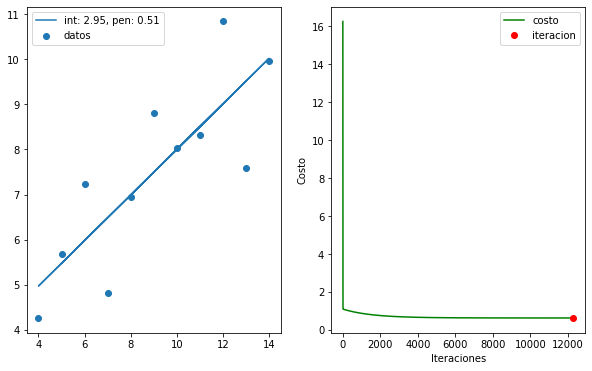

In [19]:
plotModelo(x1,y1,uno,12291)

In [20]:
dos=RegresionLineal(alpha=0.003, max_iters=10000000, tols=0.0000001)
dos.gradientDescent(x2,y2)

La función convergió con beta: [2.9481381  0.50522536] en la iteración 12293


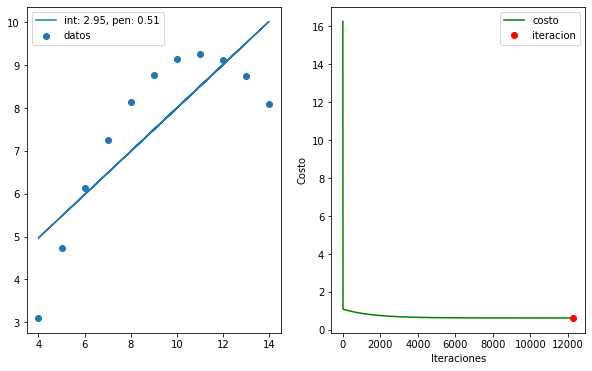

In [21]:
plotModelo(x2,y2,dos,12292)

In [22]:
tres=RegresionLineal(alpha=0.003, max_iters=10000000, tols=0.0000001)
tres.gradientDescent(x3,y3)

La función convergió con beta: [2.94967268 0.50495371] en la iteración 12294


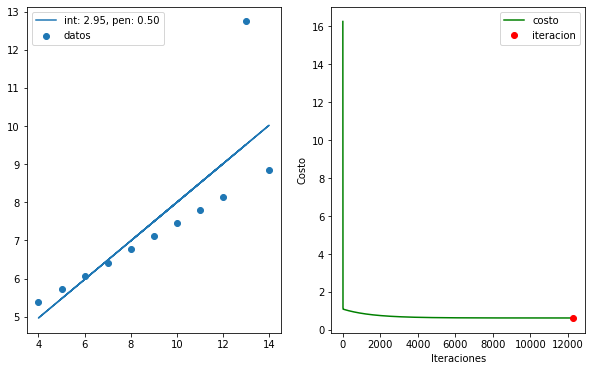

In [23]:
plotModelo(x3,y3,tres,12293)

In [24]:
cuatro=RegresionLineal(alpha=0.003, max_iters=10000000, tols=0.0000001)
cuatro.gradientDescent(x4,y4)

La función convergió con beta: [2.94895873 0.50513421] en la iteración 12294


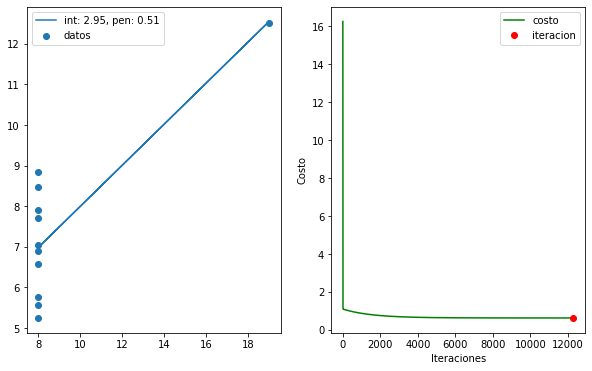

In [25]:
plotModelo(x4,y4,cuatro,12293)


## Problema 5

Use el archivo `radioactive_decay.dat`

In [26]:
%cat radioactive_decay.txt

#time   N_(remaining)
0.0	10.48
1.0	7.54
2.0	5.49
3.0	4.02
4.0	2.74
5.0	2.02
6.0	1.50
7.0	1.09
8.0	0.68
9.0	0.57
10.0	0.37
11.0	0.31
12.0	0.19
13.0	0.15
14.0	0.13
15.0	0.11


In [27]:
datos=np.loadtxt("radioactive_decay.txt")
time=datos.T[0]
rema=datos.T[1]

Text(0, 0.5, 'N_Remaining')

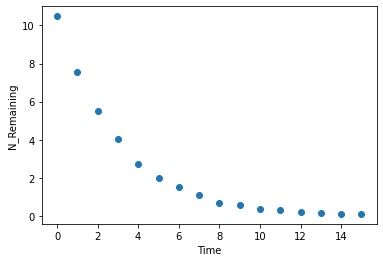

In [28]:
plt.scatter(time,rema,label='Datos')
plt.xlabel('Time')
plt.ylabel('N_Remaining')

In [29]:
reg=RegresionLineal(alpha=0.003, max_iters=10000000, tols=0.0000001)
reg.gradientDescent(time,rema)

La función convergió con beta: [ 6.43577297 -0.54728535] en la iteración 7016


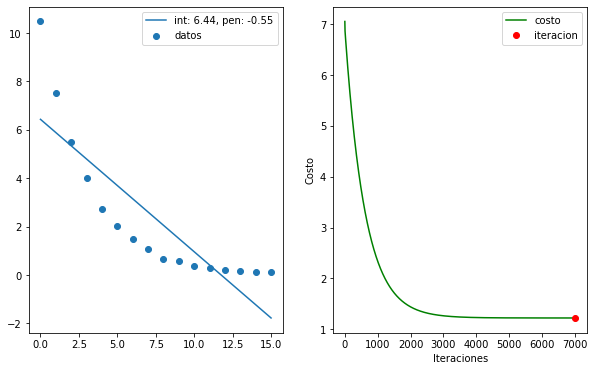

In [30]:
plotModelo(time,rema,reg,7015)

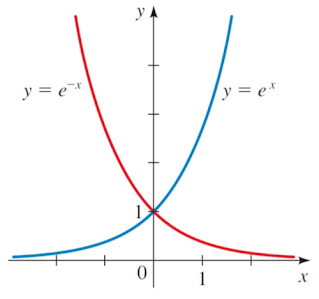

In [31]:
grafica=Image(filename='graficae.png')
grafica

**(a)** Grafique los datos ¿Qué forma tienen?

**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`



<div class="alert alert-success">
   Al graficar el ejercicio 5, vemos que tiene una forma irregular, similar a la de un "boomerang". Es por ello, que la regresion no va a funcionar dado que esto no es lineal. Viendolo mas de cerca, es muy similar a la grafica de e^-x, por lo que al aplicar logaritmo, podemos tener valores lineales ( si se aplica log en la funcion e^-x, te queda -x). 
</div>

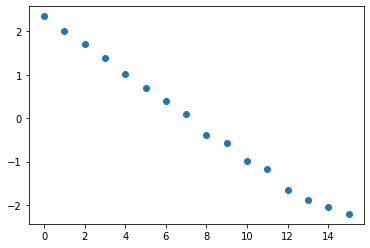

In [32]:
logrema=np.log(rema)
plt.scatter(time,logrema)

In [33]:
radiodecay=list(zip(time,logrema))
radio=np.array(radiodecay)
radio

array([[ 0.        ,  2.34946868],
       [ 1.        ,  2.02022218],
       [ 2.        ,  1.70292826],
       [ 3.        ,  1.3912819 ],
       [ 4.        ,  1.00795792],
       [ 5.        ,  0.70309751],
       [ 6.        ,  0.40546511],
       [ 7.        ,  0.0861777 ],
       [ 8.        , -0.38566248],
       [ 9.        , -0.56211892],
       [10.        , -0.99425227],
       [11.        , -1.17118298],
       [12.        , -1.66073121],
       [13.        , -1.89711998],
       [14.        , -2.04022083],
       [15.        , -2.20727491]])

In [36]:
np.savetxt("transform_radioactive_decay",radio)

In [40]:
datos5=np.loadtxt('transform_radioactive_decay')
datos5

array([[ 0.        ,  2.34946868],
       [ 1.        ,  2.02022218],
       [ 2.        ,  1.70292826],
       [ 3.        ,  1.3912819 ],
       [ 4.        ,  1.00795792],
       [ 5.        ,  0.70309751],
       [ 6.        ,  0.40546511],
       [ 7.        ,  0.0861777 ],
       [ 8.        , -0.38566248],
       [ 9.        , -0.56211892],
       [10.        , -0.99425227],
       [11.        , -1.17118298],
       [12.        , -1.66073121],
       [13.        , -1.89711998],
       [14.        , -2.04022083],
       [15.        , -2.20727491]])

In [42]:
timet=datos5.T[0]
logremat=datos5.T[1]
regtrans=RegresionLineal(alpha=0.003, max_iters=10000000, tols=0.0000001)
regtrans.gradientDescent(timet,logremat)


La función convergió con beta: [ 2.27548901 -0.31459673] en la iteración 5755


Text(0, 0.5, 'N_remaining')

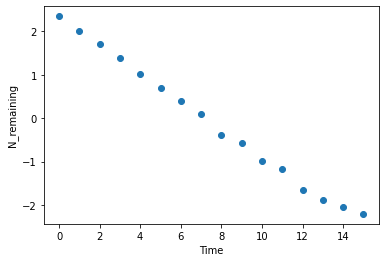

In [43]:
plt.scatter(timet,logremat)
plt.xlabel("Time")
plt.ylabel("N_remaining")

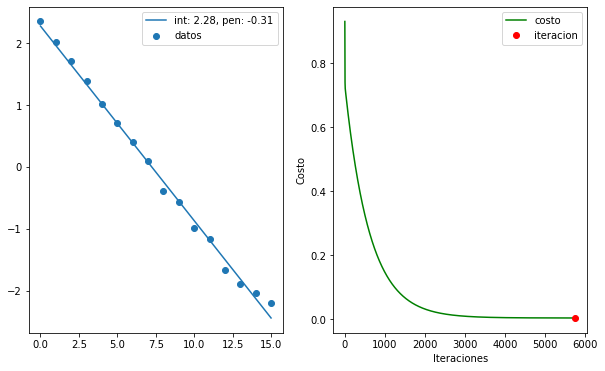

In [44]:
plotModelo(timet,logremat,regtrans,5744)

**(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.

<div class="alert alert-success">
    Los valores para Beta que mejor se ajustan son donde la funcion Costo converge. Para el espacio normal es en la iteracion 7016 que arroja los valores[ 6.43577297 -0.54728535]. En el espacio donde esta aplicado logaritmo, la funcion costo converge en la iteracion 5755 y arroja los valores [ 2.27548901 -0.31459673]
</div>
